In [42]:
import pandas as pd
df=pd.read_csv('/content/AAPL (5) _main file.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.890799,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.677595,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.213049,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.117680,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.161058,458707200
...,...,...,...,...,...,...,...
1254,2017-12-22,43.669998,43.855000,43.625000,43.752499,41.673252,65397600
1255,2017-12-26,42.700001,42.867500,42.419998,42.642502,40.616016,132742000
1256,2017-12-27,42.525002,42.695000,42.427502,42.650002,40.623150,85992800
1257,2017-12-28,42.750000,42.962502,42.619999,42.770000,40.737446,65920800


In [43]:
df1=df.iloc[:,[1,5]]
df1

,Open,Adj Close
0,19.779285,16.890799
1,19.567142,16.677595
2,19.177500,16.213049
3,18.642857,16.117680
4,18.900356,16.161058
...,...,...
1254,43.669998,41.673252
1255,42.700001,40.616016
1256,42.525002,40.623150
1257,42.750000,40.737446


In [44]:
df1.shape

(1259, 2)

In [45]:
len(df1)

1259

In [46]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))  #you must pass to MinMaxScaler function a 2D input
df1_scaled=scalar.fit_transform(df1)
df1_scaled

array([[0.19795893, 0.16061139],
       [0.19086893, 0.15348663],
       [0.17784675, 0.13796265],
       ...,
       [0.95814044, 0.9536882 ],
       [0.96566006, 0.95750769],
       [0.96164959, 0.94278656]])

In [47]:
df1_scaled.shape

(1259, 2)

In [48]:
split_percent=0.65
split=int(split_percent*len(df1_scaled))
split

818

In [49]:
train_data=df1_scaled[:split]
train_data

array([[0.19795893, 0.16061139],
       [0.19086893, 0.15348663],
       [0.17784675, 0.13796265],
       ...,
       [0.44471235, 0.44005311],
       [0.45365243, 0.43566278],
       [0.44579853, 0.44336529]])

In [50]:
test_data=df1_scaled[split:]
test_data

array([[0.45950108, 0.45206929],
       [0.45189787, 0.44197879],
       [0.45791362, 0.45083688],
       [0.4555741 , 0.43219651],
       [0.44688474, 0.43312097],
       [0.44738602, 0.43589383],
       [0.45047742, 0.44683149],
       [0.4626761 , 0.45915564],
       [0.46952737, 0.45961771],
       [0.4736214 , 0.4422869 ],
       [0.4467176 , 0.42403187],
       [0.4382788 , 0.41964147],
       [0.42791837, 0.42133598],
       [0.43034138, 0.41240106],
       [0.4142994 , 0.4101672 ],
       [0.41421581, 0.40554575],
       [0.40510866, 0.39992302],
       [0.33901887, 0.34962538],
       [0.35247077, 0.32659474],
       [0.32222485, 0.31819892],
       [0.32205778, 0.31742864],
       [0.32397945, 0.3292907 ],
       [0.33233466, 0.32166505],
       [0.32230844, 0.31872017],
       [0.31704468, 0.31469075],
       [0.31395322, 0.31523308],
       [0.31671044, 0.32011511],
       [0.31796376, 0.31306314],
       [0.31161376, 0.29624687],
       [0.28888757, 0.29764178],
       [0.

In [51]:
print(len(train_data),'  ', len(test_data))

818    441


In [52]:
len(train_data)-60-1

757

In [53]:
import numpy
#create dataset
def  create_dataset (dataset, time_step):
      data_x=[] 
      data_y=[]
      for i in range(len(dataset)-time_step):#i=0,1,2,3,4,....
          a=dataset[i:(i+time_step)]
          data_x.append(a)
          data_y.append(dataset[i+time_step])
      return numpy.array(data_x), numpy.array(data_y) 
#0..59>>60
#1..60>>61
#2..61>>62
#3..62>>63


In [54]:
time_step=60
x_train,y_train=create_dataset (train_data, time_step)
x_test,y_test=create_dataset (test_data, time_step)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(758, 60, 2)
(758, 2)
(381, 60, 2)
(381, 2)


In [55]:
len(train_data)

818

In [56]:
print(len(x_train),'',len(train_data)-time_step)

758  758


In [57]:
print(len(x_test),'',len(test_data)-time_step)

381  381


In [58]:
#reshape input to be [samples,time_steps,features] which is required to lstm
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],2)
x_train.shape

(758, 60, 2)

In [59]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],2)
x_test.shape

(381, 60, 2)

In [60]:
from keras.models import Sequential
from keras.layers import*

In [61]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step,2)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=2))

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10600     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 51,102
Trainable params: 51,102
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [64]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 5s 13ms/step - loss: 0.0177
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 7/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 8/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 9/100
24/24 [==============================] - 0s 10ms/step - loss: 9.6612e-04
Epoch 10/100
24/24 [==============================] - 0s 10ms/step - loss: 8.9436e-04
Epoch 11/100
24/24 [==============================] - 0s 16ms/step - loss: 8.9496e-04
Epoch 12/100
24/24 [==============================] - 0s 15ms/step - loss: 8.3987e-04
Epoch 13/

In [65]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

12/12 [==============================] - 0s 6ms/step


In [66]:
y_test.shape

(381, 2)

In [67]:
test_predict.shape

(381, 2)

In [68]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [69]:
train_predict.shape

(758, 2)

In [70]:
y_train.shape

(758, 2)

In [71]:
y_train=scalar.inverse_transform(y_train)  #to make inverse transform
y_test=scalar.inverse_transform(y_test)

In [72]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,train_predict)  
mse_train

0.1491818160383244

In [73]:
mse_test=mean_squared_error(y_test,test_predict)  
mse_test

0.32098075758360844

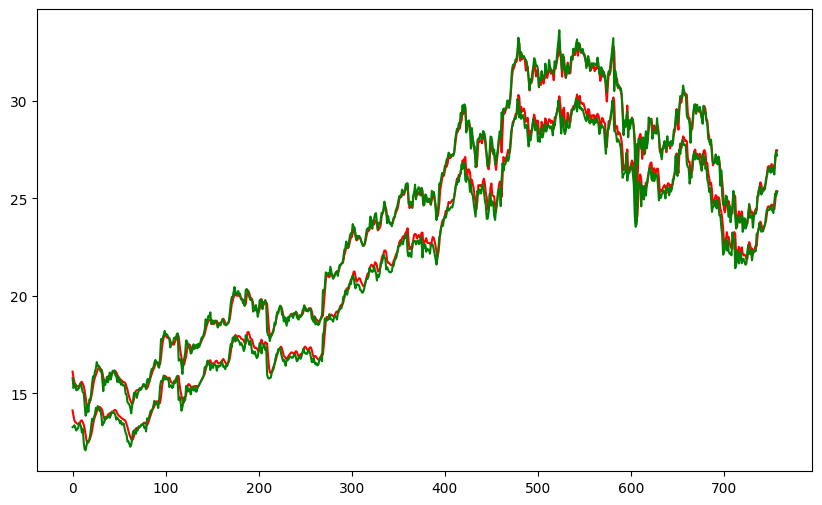

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train_predict,color='red',label="predictions stock")
plt.plot(y_train,color='green',label="actual stock")

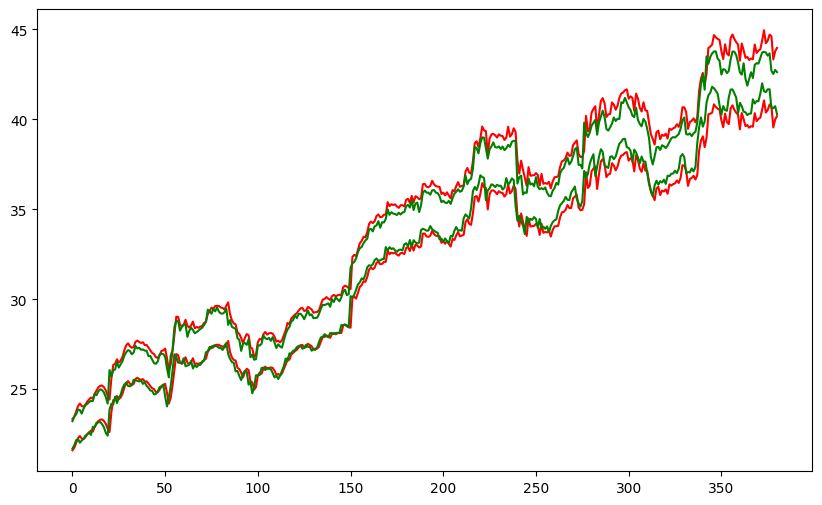

In [75]:
plt.figure(figsize=(10,6))
plt.plot(test_predict,color='red',label="predictions stock")
plt.plot(y_test,color='green',label="actual stock")

In [76]:
train_predict.shape


(758, 2)

In [77]:
test_predict.shape

(381, 2)

In [78]:
y_test[0]

array([23.225   , 21.703278])

In [79]:
test_predict[0]

array([23.347672, 21.609188], dtype=float32)

In [80]:
trainpredictplot=numpy.empty_like(df1)#create a new array with the same shape and type as a given array.
trainpredictplot[:,:]=numpy.nan
trainpredictplot[time_step:len(train_predict)+time_step,:]=train_predict


In [81]:
testpredictplot=numpy.empty_like(df1)
testpredictplot[:,:]=numpy.nan
testpredictplot[split+time_step:len(test_predict)+split+time_step,:]=test_predict


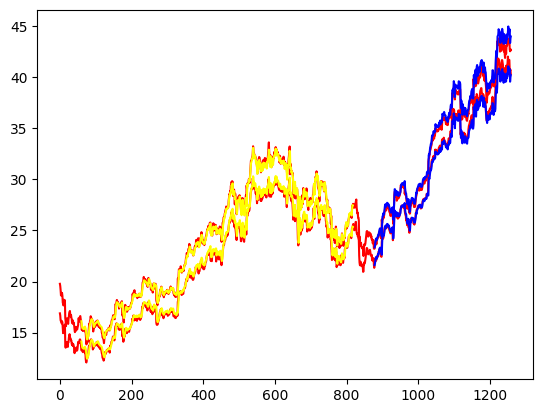

In [82]:
plt.plot(df1,color='red')
plt.plot(trainpredictplot,'yellow')
plt.plot(testpredictplot,color='blue')